In [1]:
# import all function from module.NaiveNN
import numpy as np
import matplotlib.pyplot as plt

from module.NaiveNN import *

# NN Optimization example
Interactive case, in this notebook we compare normal optimization and adam one

In [2]:
# define the N, D of the system
N = 2
D = 2
H = 10

# initialize the parameters
RW_params = init_params_guess(N, D, H, alpha=-0.5, epsilon=0.5, gamma=10.0)

In [3]:
# get the mean energy with optimized params

run_step = 100000
RW_chain = metropolis(N, D, RW_params, run_step, 0.1)

# get the energy
RW_energy=0
for i in range(run_step):
    RW_energy += local_potential_energy(RW_chain[i]) + local_kinetic_energy(RW_chain[i], RW_params)
RW_energy /= run_step

print("The mean energy RW: ", RW_energy)

/home/luigi/Documents/PHYSICS/CP/Project_2_group/FYS4411-Project2/NN/InteractiveNN/module/NaiveNN.py:252: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  z0 = np.dot(W0, norm2)
/home/luigi/Documents/PHYSICS/CP/Project_2_group/FYS4411-Project2/NN/InteractiveNN/module/NaiveNN.py:259: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  z1 = np.dot(W1, relative_dist) + b1
/home/luigi/Documents/PHYSICS/CP/Project_2_group/FYS4411-Project2/NN/InteractiveNN/module/NaiveNN.py:264: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  z2 = np.dot(W2, a1) + b2


The mean energy RW:  [[3.9540818]]


In [4]:
# optimize
GD_opt_params, GD_energies = optimization(N, D, H, RW_params,
                                          optimization_steps=30, batch_size=500, lr=0.01, decay=0.9, verbose=True)

Step:  0 Energy:  3.7401003233965784
Step:  1 Energy:  3.745109122063752
Step:  2 Energy:  3.1993963491056547
Step:  3 Energy:  3.5318352383422438
Step:  4 Energy:  3.4619579411470696
Step:  5 Energy:  3.2058518332914847
Step:  6 Energy:  3.4680436240933354
Step:  7 Energy:  3.4846221542373743
Step:  8 Energy:  3.30059704565906
Step:  9 Energy:  3.515444918098739
Step:  10 Energy:  3.218178616300141
Step:  11 Energy:  3.0681119557062306
Step:  12 Energy:  3.1989177629866417
Step:  13 Energy:  3.1188314818133174
Step:  14 Energy:  3.005210577794894
Step:  15 Energy:  3.0899363028278946
Step:  16 Energy:  3.1915908879344865
Step:  17 Energy:  3.1679734754191076
Step:  18 Energy:  2.808685330897156
Step:  19 Energy:  3.0772552309944174
Step:  20 Energy:  2.8866616485190986
Step:  21 Energy:  2.944074597992918
Step:  22 Energy:  3.0106832315006313
Step:  23 Energy:  3.2990682669219105
Step:  24 Energy:  3.1886609324641064
Step:  25 Energy:  3.0344487445200286
Step:  26 Energy:  3.276674330

In [5]:
# optimize with adam
ADAM_opt_params, ADAM_energies = optimization_adam(N, D, H, RW_params,
                                                   optimization_steps=30, batch_size=500, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, verbose=True)

Step:  0 Energy:  3.1771566332595653
Step:  1 Energy:  2.8548422134142224
Step:  2 Energy:  3.0037793828672186
Step:  3 Energy:  3.0345428263634675
Step:  4 Energy:  3.0669764574447376
Step:  5 Energy:  3.103468242108542
Step:  6 Energy:  3.2662635974708256
Step:  7 Energy:  2.9826524570534456
Step:  8 Energy:  2.9842515895620845
Step:  9 Energy:  3.034776287942457
Step:  10 Energy:  2.7782366939151735
Step:  11 Energy:  3.036220494566157
Step:  12 Energy:  2.9933122394631413
Step:  13 Energy:  3.045051695455556
Step:  14 Energy:  3.0120889449404804
Step:  15 Energy:  3.043907118444393
Step:  16 Energy:  2.9989820439332817
Step:  17 Energy:  3.0188069871684564
Step:  18 Energy:  2.9339878506418806
Step:  19 Energy:  3.071882495701616
Step:  20 Energy:  2.9435404777650125
Step:  21 Energy:  3.0018773848624916
Step:  22 Energy:  3.063985222545337
Step:  23 Energy:  3.0736118866486337
Step:  24 Energy:  3.020219493148941
Step:  25 Energy:  3.041088074896391
Step:  26 Energy:  3.0798067819

Text(0, 0.5, 'energy')

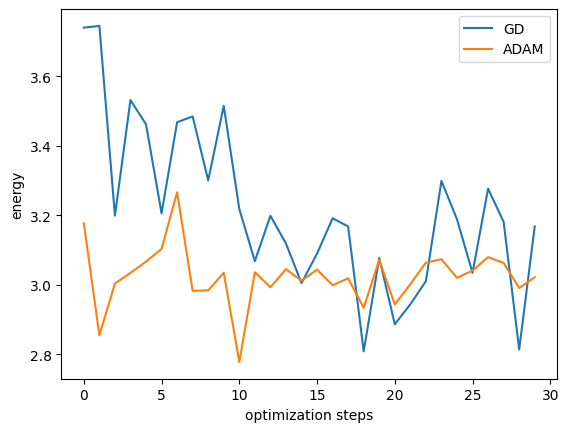

In [6]:
# plot energy
plt.figure()
plt.plot(GD_energies, label='GD')
plt.plot(ADAM_energies, label='ADAM')
plt.legend()
plt.xlabel('optimization steps')
plt.ylabel('energy')

In [7]:



GD_chain = metropolis(N, D, GD_opt_params, run_step, 0.1)
GD_energy=0
for i in range(run_step):
    GD_energy += local_potential_energy(GD_chain[i]) + local_kinetic_energy(GD_chain[i], GD_opt_params)
GD_energy /= run_step

print("The mean energy GD: ", GD_energy)

ADAM_chain = metropolis(N, D, ADAM_opt_params, run_step, 0.1)
ADAM_energy=0
for i in range(run_step):
    ADAM_energy += local_potential_energy(ADAM_chain[i]) + local_kinetic_energy(ADAM_chain[i], ADAM_opt_params)
ADAM_energy /= run_step

print("The mean energy ADAM: ", ADAM_energy)

The mean energy GD:  [[3.00336292]]
The mean energy ADAM:  [[3.00558878]]


In [8]:
# put gamma to zero, get a chain and the energy
opt_params_no_gamma = set_gamma_params(ADAM_opt_params, 0)
opt_params_no_gamma

run_step = 100000
chain_no_gamma = metropolis(N, D, opt_params_no_gamma, run_step, 0.1)   

energy_no_gamma=0
for i in range(run_step):
    energy_no_gamma += local_potential_energy(chain_no_gamma[i]) + local_kinetic_energy(chain_no_gamma[i], opt_params_no_gamma)

energy_no_gamma /= run_step

print("The mean energy with gamma=0 is: ", energy_no_gamma)

The mean energy with gamma=0 is:  [[3.25728722]]


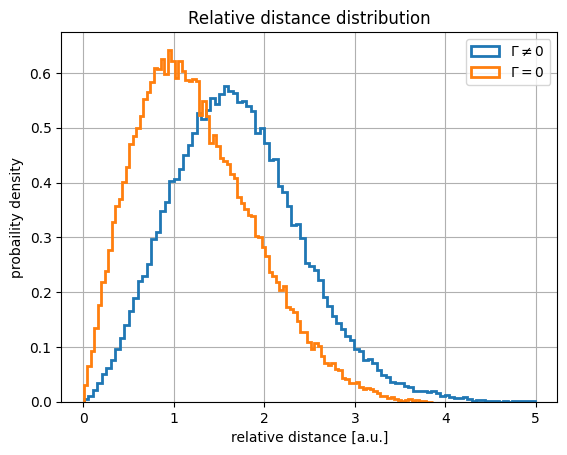

In [10]:
# get the series fo relative distance
rel_dist = np.zeros(run_step)

for i in range(run_step):
    rel_dist[i] = np.linalg.norm(ADAM_chain[i,0]-ADAM_chain[i,1])

# get distribution of relative dist with no gamma
rel_dist_no_gamma = np.zeros(run_step)

for i in range(run_step):
    rel_dist_no_gamma[i] = np.linalg.norm(chain_no_gamma[i,0]-chain_no_gamma[i,1])


# plot on the same, histogram with only line
plt.figure()
plt.hist(rel_dist, bins=100, alpha=1, label=r'$\Gamma\neq0$', histtype='step', density=True, linewidth=2)
plt.hist(rel_dist_no_gamma, bins=100, alpha=1, label=r'$\Gamma=0$', histtype='step', density=True, linewidth=2)
plt.grid()
plt.legend()
plt.xlabel('relative distance [a.u.]')
plt.ylabel('probaility density')
plt.title('Relative distance distribution')
# save in results
plt.savefig('results/relative_distance_distribution.png')